**DATA SET LINK**: https://drive.google.com/drive/folders/1AWBCJIohkEcK6-K5o5LhwC4CHWlvg9bR?usp=sharing

# Classification methods to predict employees leaving their jobs (Decision Tree, MLP, Random Forest (Bagging))


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Classification requirements

- Based on the Train set, predict on the Test set which employees would quit the jobs (field 'Attrition')
- Find out the main reason why they leave their jobs
- Examine an HR policy to retain the employees and specify how it would affect their decisions

## Dataset
- train.csv with size (1000,27)
- test.csv with sizec (470,26) 

## Targets
- Follow with steps of classification using Tree
- Visualize datasets
- Calculate correlations between features
- Process categories
- Build model and compare accuracy of the Decision Tree with other models using other algorithms
- Use model to predict and examnine hypothesis

In [ ]:
import pandas as pd
from tensorflow.random import set_seed
set_seed(1612)
import numpy as np
np.random.seed(1612)
import seaborn as sns
sns.set()

# 1. Prepare the data



In [ ]:
import os

PATH = '/content/drive/My Drive/Colab Notebooks/employee'

df_raw = pd.read_csv(os.path.join(PATH, 'train.csv'), index_col='EmployeeNumber')
df_test = pd.read_csv(os.path.join(PATH, 'test.csv'), index_col='EmployeeNumber')

Print out the train set

In [ ]:
df_raw.describe()

Age  ...  YearsWithCurrManager
count  1000.000000  ...           1000.000000
mean     36.992000  ...              4.168000
std       9.417783  ...              3.630283
min      18.000000  ...              0.000000
25%      30.000000  ...              2.000000
50%      36.000000  ...              3.000000
75%      43.000000  ...              7.000000
max      60.000000  ...             17.000000

[8 rows x 19 columns]

In [ ]:
df_raw.head()

Age Attrition  ... YearsSinceLastPromotion YearsWithCurrManager
EmployeeNumber                 ...                                             
1                41       Yes  ...                       0                    5
2                49        No  ...                       1                    7
4                37       Yes  ...                       0                    0
5                33        No  ...                       3                    0
7                27        No  ...                       2                    2

[5 rows x 27 columns]

## Features explanation

**Education**
1. 'Below College'
2. 'College'
3. 'Bachelor'
4. 'Master'
5. 'Doctor'

**EnvironmentSatisfaction**
1. 'Low'
2. 'Medium'
3. 'High'
4. 'Very High'

**JobSatisfaction**
1. 'Low'
2. 'Medium'
3. 'High'
4. 'Very High'

**PerformanceRating**
1. 'Low'
2. 'Good'
3. 'Excellent'
4. 'Outstanding'

**RelationshipSatisfaction**
1. 'Low'
2. 'Medium'
3. 'High'
4. 'Very High'

**WorkLifeBalance**
1. 'Bad'
2. 'Good'
3. 'Better'
4. 'Best'

## Review unique values

In [ ]:
df_raw.Department.unique() # thử đổi features cột

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

## Check other features

In [ ]:
df_raw.EducationField.unique() 

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

The Target is to predict whether employees quit their jobs or not.

Then, the main column is **`Attrition`** with values **{Yes, No}**, sow, I will change them into numeric types **{1, 0} (Yes / No)**.

In [ ]:
df_test.head()

Age  ... YearsWithCurrManager
EmployeeNumber       ...                     
1409             52  ...                    4
1411             37  ...                    2
1412             35  ...                    2
1415             25  ...                    2
1417             26  ...                    7

[5 rows x 26 columns]

## Transform categorical values to numerical values for Attrition

In [ ]:
# 1. Google search for usage of pandas map() function
# 2. Apply it on Attrition column for df_raw
# 3. Print out the first 5 columns of df_raw
df_raw['Attrition'] = df_raw['Attrition'].map({'Yes': 1, 'No': 0})
df_raw.head()

Age  Attrition  ... YearsSinceLastPromotion YearsWithCurrManager
EmployeeNumber                  ...                                             
1                41          1  ...                       0                    5
2                49          0  ...                       1                    7
4                37          1  ...                       0                    0
5                33          0  ...                       3                    0
7                27          0  ...                       2                    2

[5 rows x 27 columns]

## Create X, y for training

In [ ]:
# 1. Create y from Attrition column
# 2. Create df_full = df_raw without Attrition column
# 3. Print out the shape of df_full
# 4. Print out the first 5 columns of df_full
y = df_raw.Attrition # chỉ khi tên cột ko có space # model thì df hay np đều nhận
df_full = df_raw.drop(columns=['Attrition'])
print(df_full.shape)
df_full.head()

(1000, 26)


Age  ... YearsWithCurrManager
EmployeeNumber       ...                     
1                41  ...                    5
2                49  ...                    7
4                37  ...                    0
5                33  ...                    0
7                27  ...                    2

[5 rows x 26 columns]

## Transform categorical values into numeric values for model.


## Check the data types of all features

In [ ]:
df_full.info() # check nào số nào ko phải số

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1408
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1000 non-null   int64 
 1   BusinessTravel            1000 non-null   object
 2   Department                1000 non-null   object
 3   DistanceFromHome          1000 non-null   int64 
 4   Education                 1000 non-null   int64 
 5   EducationField            1000 non-null   object
 6   EmployeeCount             1000 non-null   int64 
 7   EnvironmentSatisfaction   1000 non-null   int64 
 8   Gender                    1000 non-null   object
 9   JobRole                   1000 non-null   object
 10  JobSatisfaction           1000 non-null   int64 
 11  MaritalStatus             1000 non-null   object
 12  MonthlyIncome             1000 non-null   int64 
 13  NumCompaniesWorked        1000 non-null   int64 
 14  OverTime                

In [ ]:
print(y)

EmployeeNumber
1       1
2       0
4       1
5       0
7       0
       ..
1402    0
1403    0
1405    1
1407    0
1408    0
Name: Attrition, Length: 1000, dtype: int64


In [ ]:
# 1. Get the name of all columns which have dtype == 'object'
# 2. Get the name of all columns which have dtype != 'object'
# 3. Name them cols_cat and cols_num
# 4. Print out the values
g = df_full.columns.to_series().groupby(df_full.dtypes).groups
print(g)
dct = {k.name: v for k, v in g.items()}
print(dct)
# {'object': ['C', 'D'], 'int64': ['A', 'E'], 'float64': ['B']}
print(dct.get('object'))
print(dct.get('int64'))

{dtype('int64'): Index(['Age', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'MonthlyIncome',
       'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object'), dtype('O'): Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object')}
{'int64': Index(['Age', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'MonthlyIncome',
       'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'Year

In [ ]:
cols_cat = [x for x in df_full.columns if (df_full[x].dtypes=='object')]
cols_num = [x for x in df_full.columns if (df_full[x].dtypes!='object')]
print(cols_cat)
print(cols_num)

['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
['Age', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EnvironmentSatisfaction', 'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


# 2. Explore the dataset


## 2.1 View the dataset by Pair Plot

In [ ]:
#sns.pairplot(df_raw)

## 2.2 Correlation between features using the Pearson correlation
$$ 
r_{xy}={\frac {\sum _{i=1}^{n}(x_{i}-{\bar {x}})(y_{i}-{\bar {y}})}{{\sqrt {\sum _{i=1}^{n}(x_{i}-{\bar {x}})^{2}}}{\sqrt {\sum _{i=1}^{n}(y_{i}-{\bar {y}})^{2}}}}}
$$

In [ ]:
df_full[cols_num].corr()

Age  ...  YearsWithCurrManager
Age                       1.000000  ...              0.199571
DistanceFromHome         -0.018776  ...             -0.009326
Education                 0.182582  ...              0.093444
EmployeeCount                  NaN  ...                   NaN
EnvironmentSatisfaction   0.035695  ...             -0.011404
JobSatisfaction          -0.022625  ...             -0.051252
MonthlyIncome             0.505284  ...              0.347135
NumCompaniesWorked        0.312032  ...             -0.092171
PercentSalaryHike        -0.044510  ...             -0.037266
PerformanceRating        -0.053793  ...              0.002388
RelationshipSatisfaction  0.053249  ...              0.001651
StockOptionLevel          0.003061  ...              0.032621
TotalWorkingYears         0.690203  ...              0.455516
TrainingTimesLastYear    -0.005170  ...             -0.018257
WorkLifeBalance          -0.029218  ...              0.004667
YearsAtCompany            0.316925  ...              0.761015
YearsInCurrentRole        0.205668  ...              0.720892
YearsSinceLastPromotion   0.215158  ...              0.497363
YearsWithCurrManager      0.199571  ...              1.000000

[19 rows x 19 columns]

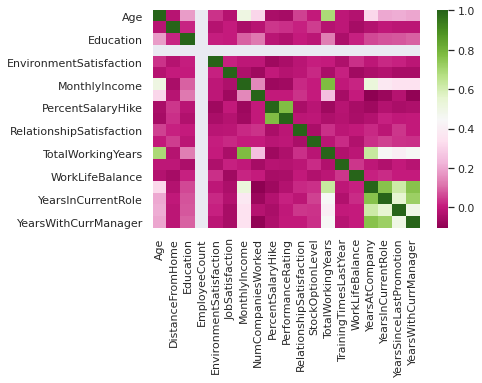

In [ ]:
sns.heatmap(df_full[cols_num].corr(),cmap="PiYG")

# 3. Process category
- Many methods can be used: label encoding, onehot encoding, count encoding, target encoding, etc. Based on a certain dataset, each method has pros and cons. SkLearn has libraries to process categories and they can be found online.
- To simplify the process, I will use One Hot Encoding for this project.

## One Hot Encoding

Pandas library provided a function get_dummies to apply the One Hot Encoding.

In [ ]:
df_full.head(10)

Age  ... YearsWithCurrManager
EmployeeNumber       ...                     
1                41  ...                    5
2                49  ...                    7
4                37  ...                    0
5                33  ...                    0
7                27  ...                    2
8                32  ...                    6
10               59  ...                    0
11               30  ...                    0
12               38  ...                    8
13               36  ...                    7

[10 rows x 26 columns]

In [ ]:
example = pd.get_dummies(df_full.Department)
example.head()

Human Resources  Research & Development  Sales
EmployeeNumber                                                
1                             0                       0      1
2                             0                       1      0
4                             0                       1      0
5                             0                       1      0
7                             0                       1      0

In [ ]:
# 1. Apply one hot encoding for all categorical columns
# 2. concat
one_hot = pd.get_dummies(df_full[cols_cat])
one_hot.head()
one_hot

BusinessTravel_Non-Travel  ...  OverTime_Yes
EmployeeNumber                             ...              
1                                       0  ...             1
2                                       0  ...             0
4                                       0  ...             1
5                                       0  ...             1
7                                       0  ...             0
...                                   ...  ...           ...
1402                                    0  ...             1
1403                                    0  ...             1
1405                                    0  ...             1
1407                                    0  ...             0
1408                                    0  ...             0

[1000 rows x 28 columns]

In [ ]:
# pd.concat auto delete the original column
df_full_merge = pd.concat([df_full[cols_num], pd.get_dummies(data=df_full[cols_cat])], axis=1) # Train
df_test_merge = pd.concat([df_test[cols_num], pd.get_dummies(data=df_test[cols_cat])], axis=1) # Test
print(df_full_merge.shape)
df_full_merge.head(3)

(1000, 47)


Age  DistanceFromHome  ...  OverTime_No  OverTime_Yes
EmployeeNumber                         ...                           
1                41                 1  ...            0             1
2                49                 8  ...            1             0
4                37                 2  ...            0             1

[3 rows x 47 columns]

# 4. Build model
- Deep Learning
- Decision Tree
- Random Forest (Ensemble of Decision tree)
- Compare models

## Split the dataset into 2 Set: Train và Validation

In [ ]:
# 1. Apply Train Test Split, test_size=0.2
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(df_full_merge,y,test_size=0.4,shuffle=True,random_state=1612)
print('Shape of X_train:', X_train.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of X_val:', X_val.shape)
print('Shape of y_val:', y_val.shape)

Shape of X_train: (600, 47)
Shape of y_train: (600,)
Shape of X_val: (400, 47)
Shape of y_val: (400,)


When applying the Decision Tree, I don't need to scale the data.

However, I would like to compare performance between Decision Tree and Deep Neural Network so I would have to scale the data to run the Deep Neural Network better.

## Scale the data

In [ ]:
# 1. Apply Standard Scaler on X_train, X_val
# 2. Name the scaled X_train_scaled, X_val_scaled
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [ ]:
print(X_train_scaled.shape)

(600, 47)


In [ ]:
print(y.shape)

(1000,)


## Build a Deep Neural Network model

In [ ]:
# 1. Define and combine DNN model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Sequential, Model
import matplotlib.pyplot as plt

input = Input(shape=X_train_scaled.shape[1:])
dense = Dense(64, activation='relu')(input)
dense = Dense(64, activation='relu')(dense)
output = Dense(1, activation='sigmoid')(dense)
model = Model(input, output)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')

## Train the Deep Neural Network model

In [ ]:
# 1. Train model
history = model.fit(X_train_scaled, y_train, epochs=5, validation_data=(X_val_scaled, y_val)) # X has many columns, y has only 0 and 1

Epoch 1/5
19/19 [==============================] - 0s 8ms/step - loss: 0.6059 - accuracy: 0.6783 - val_loss: 0.4362 - val_accuracy: 0.8450
Epoch 2/5
19/19 [==============================] - 0s 5ms/step - loss: 0.4277 - accuracy: 0.8250 - val_loss: 0.4066 - val_accuracy: 0.8450
Epoch 3/5
19/19 [==============================] - 0s 4ms/step - loss: 0.3844 - accuracy: 0.8300 - val_loss: 0.3899 - val_accuracy: 0.8525
Epoch 4/5
19/19 [==============================] - 0s 4ms/step - loss: 0.3526 - accuracy: 0.8483 - val_loss: 0.3748 - val_accuracy: 0.8600
Epoch 5/5
19/19 [==============================] - 0s 4ms/step - loss: 0.3255 - accuracy: 0.8700 - val_loss: 0.3634 - val_accuracy: 0.8600


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 

model_decisiontree = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=1612) # entropy or gini
model_randomforest = RandomForestClassifier(criterion='entropy', max_depth=4, random_state=1612, n_estimators=300) # 300 decistion trees --> Random forest

# Train model:
model_decisiontree.fit(X_train, y_train)
model_randomforest.fit(X_train, y_train)

print('Decision Tree score: ' + str(model_decisiontree.score(X_val, y_val)))
print('Random forest score: ' + str(model_randomforest.score(X_val, y_val))) # default = voting, not avg

Decision Tree score: 0.805
Random forest score: 0.8475


In [ ]:
# Feature importance: the larger of the weight of a feature, the greater importance that feature will have
def drawFeatureImportance(model, title, n_top):
  importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(model.feature_importances_,3)})
  importances = importances.sort_values('importance',ascending=False).head(n_top)
  sns.barplot(y=importances['feature'],x=importances['importance']).set_title(title)

## Features having the most significant impact on the prediction's results

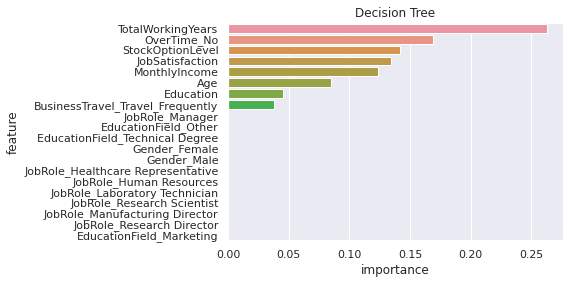

In [ ]:
drawFeatureImportance(model_decisiontree, 'Decision Tree',20)

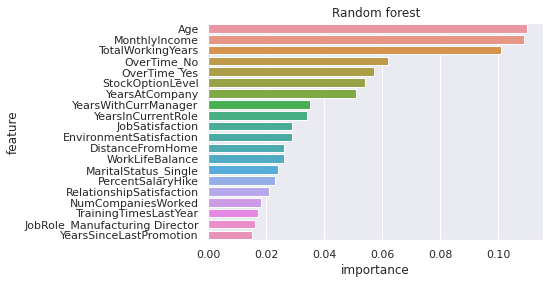

In [ ]:
drawFeatureImportance(model_randomforest, 'Random forest',20)

In [ ]:
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

# draw tree
def drawTree(model):
  dot_data = StringIO()
  export_graphviz(model, out_file=dot_data,  
                  filled=True, rounded=True,
                  special_characters=True,
                  feature_names = X_train.columns,
                  class_names=[str(x) for x in model.classes_]
                  )
  graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
  return graph.create_png()

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)



## Reasons which might cause employees to quit the jobs or not

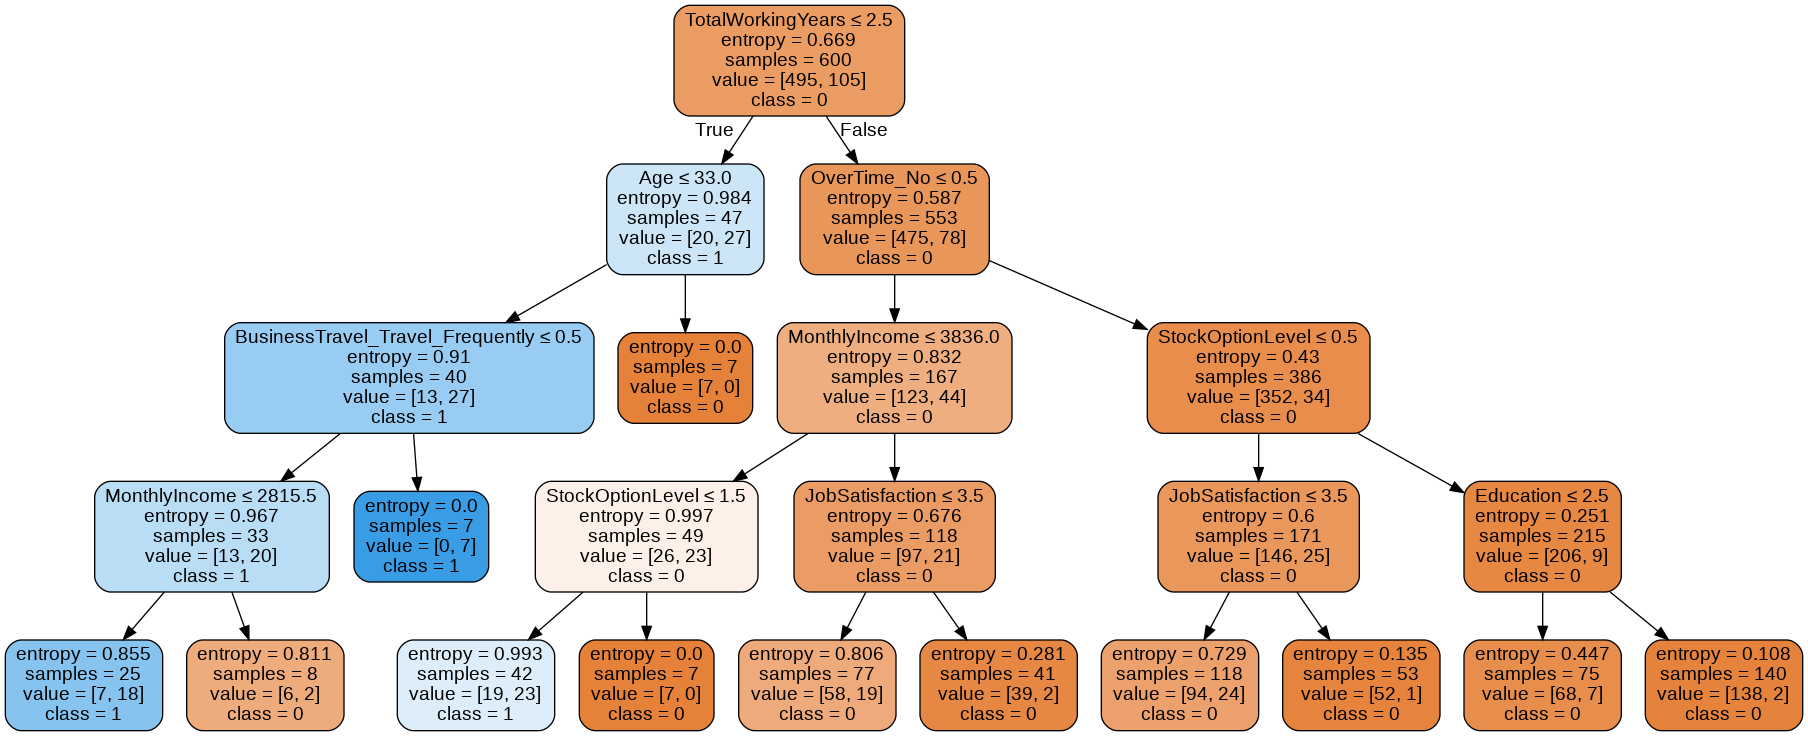

In [ ]:
Image(drawTree(model_decisiontree))
# Left: Yes, Right: No
# Entropy impurity

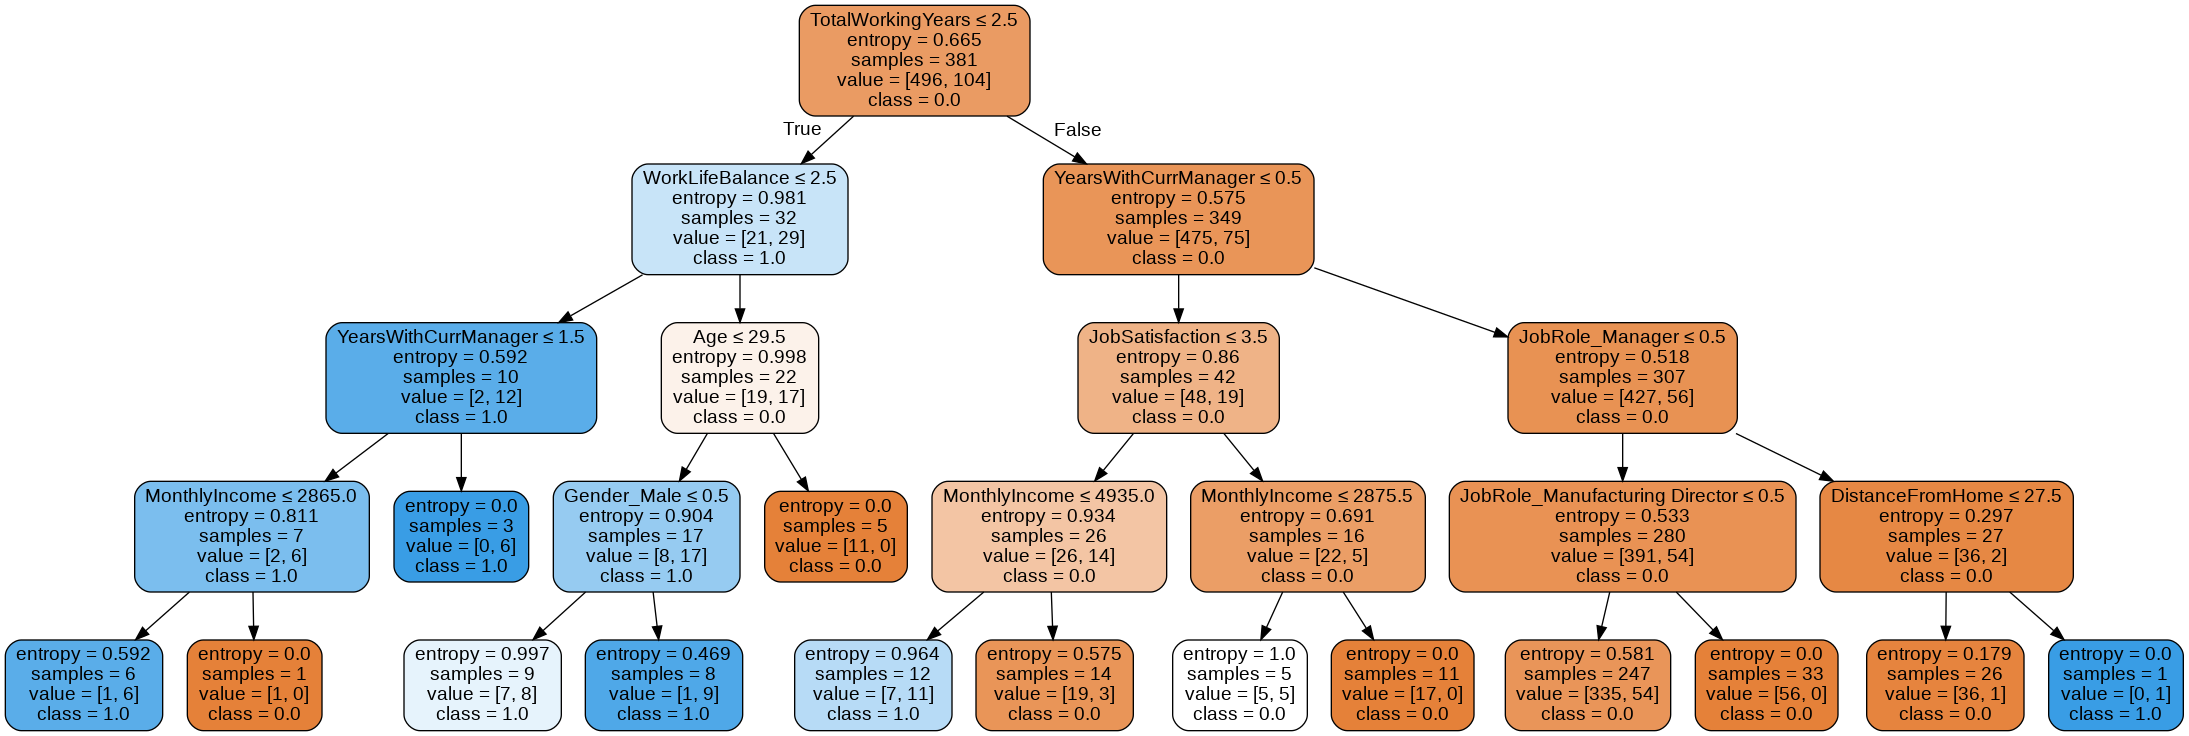

In [ ]:
Image(drawTree(model_randomforest.estimators_[100]))

Reasons to quit the job: Work Life Balance <= 2.5, Age <= 29.5, Month Income <= 2,865.0, Female (more likely).

Reasons not to quit the job: Total working Years > 2.5, Years With Current Manager > 0.5, Monthly Income > 4,935.0, Distance from Home <= 27.5.

## ROC & AUC
Explanation:

- True Possitive (TP): Event happens, Prediction shows it will happen
- False Possitive (FP): Event happens, Prediction shows it will not happen
- True Negative (TN): Event doesn't happen, Prediction shows it will happen
- False Negative (FN): Event doesn't happen, Prediction shows it will not happen

Then, I will caculate the True Positive Rate and False Positive Rate as below: 

$$ TPR = \frac{TP}{TP+FN}$$
$$ FPR = \frac{FP}{FP+TN}$$

No Skill: ROC AUC=0.500
With mlp: ROC AUC=0.761
With decision tree: ROC AUC=0.661
With random forest: ROC AUC=0.762
Best: ROC AUC=1.000


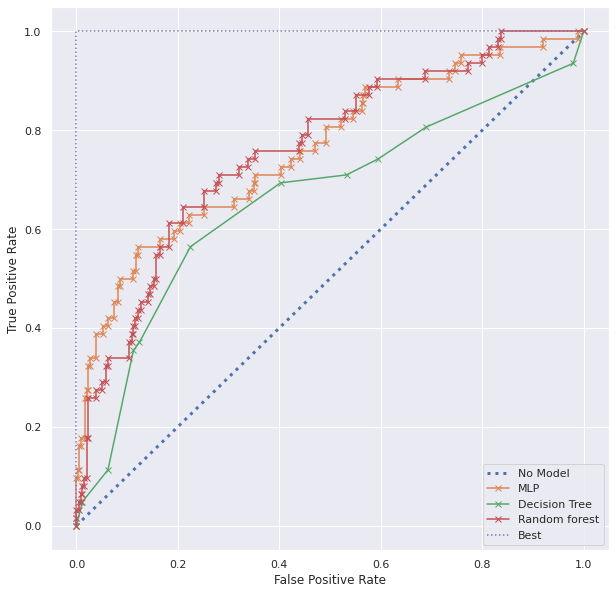

In [ ]:
# ROC & AUC
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# pred_proba = model.predict_proba(X_val)
# print('AUC: ' + str(roc_auc_score(y_val, pred_proba[:,1])))

nomodel_probs = [0 for _ in range(len(y_val))]

mlp_probs = model.predict(X_val_scaled)[:, 0]

decisiontree_probs = model_decisiontree.predict_proba(X_val)[:, 1]

randomforest_probs = model_randomforest.predict_proba(X_val)[:, 1]

best_probs = [x for x in y_val]

nomodel_auc = roc_auc_score(y_val, nomodel_probs)
mlp_auc = roc_auc_score(y_val, mlp_probs)
decisiontree_auc = roc_auc_score(y_val, decisiontree_probs)
randomforest_auc = roc_auc_score(y_val, randomforest_probs)
best_auc = roc_auc_score(y_val, best_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (nomodel_auc))
print('With mlp: ROC AUC=%.3f' % (mlp_auc))
print('With decision tree: ROC AUC=%.3f' % (decisiontree_auc))
print('With random forest: ROC AUC=%.3f' % (randomforest_auc))
print('Best: ROC AUC=%.3f' % (best_auc))

# calculate roc curves
nomodel_fpr, nomodel_tpr, _ = roc_curve(y_val, nomodel_probs)
mlp_fpr, mlp_tpr, _ = roc_curve(y_val, mlp_probs)
decisiontree_fpr, decisiontree_tpr, _ = roc_curve(y_val, decisiontree_probs)
randomforest_fpr, randomforest_tpr, _ = roc_curve(y_val, randomforest_probs)
best_fpr, best_tpr, _ = roc_curve(y_val, best_probs)

plt.figure(figsize=(10,10))
# plot the roc curve for the model
plt.plot(nomodel_fpr, nomodel_tpr, linestyle=':',linewidth=3, label='No Model')
plt.plot(mlp_fpr, mlp_tpr, marker='x', label='MLP')
plt.plot(decisiontree_fpr, decisiontree_tpr, marker='x', label='Decision Tree')
plt.plot(randomforest_fpr, randomforest_tpr, marker='x', label='Random forest')
plt.plot(best_fpr, best_tpr, linestyle=':', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

# **Why is the Random Forest is better than Multi-Layer Perceptron (MLP) in this project while the Neural Netork is a modern and highly valaued algorithm?**

![alt text](https://www.researchgate.net/profile/Benoit_Gallix/publication/324457640/figure/fig1/AS:622298201595905@1525378861825/Graph-illustrating-the-impact-of-data-available-on-performance-of-traditional-machine.png)

Random Forest is less computationally expensive and does not require a GPU to finish training. A random forest can give you a different interpretation of a decision tree but with better performance. Neural Networks will require much more data than an everyday person might have on hand to actually be effective. The neural network will simply decimate the interpretability of your features to the point where it becomes meaningless for the sake of performance.

# 5. Predict employees who will quit the job

In [ ]:
# From the model, predicttion will give resutls as 0 and 1
predict = model_randomforest.predict(df_test_merge)
predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## Create a new Dataframe including EmployeeNumber in the df_test and predicted values (Attrition)

Recreate the data. Connect the above with Employee Number.


In [ ]:
predict = pd.DataFrame({'EmployeeNumber':df_test.index,'Attrition':predict})
predict.head()

EmployeeNumber  Attrition
0            1409          0
1            1411          0
2            1412          0
3            1415          0
4            1417          0

## Merge the remaining columns in the df_test with the newly created dataframe 

Merge the above with the remaining columns

In [ ]:
predict = predict.merge(df_test_merge, on='EmployeeNumber')
predict.head(3)

EmployeeNumber  Attrition  ...  OverTime_No  OverTime_Yes
0            1409          0  ...            1             0
1            1411          0  ...            1             0
2            1412          0  ...            1             0

[3 rows x 49 columns]

# 6. Examine an HR policy

## List of employees predicted to leave the job

In [ ]:
predict[predict['Attrition'] == 1].shape

(7, 49)

In [ ]:
new_policy = predict.copy(True)
new_policy = new_policy.drop(columns=['Attrition'])
new_policy = new_policy.drop(columns=['EmployeeNumber'])


## Execute an HR policy

In [ ]:
# X_policy['MonthlyIncome'] = X_policy['MonthlyIncome']*1.1 
# new_policy['OverTime_No'] = 1
# new_policy['OverTime_Yes'] = 0
# Change OT reversedly then test model

new_policy['MonthlyIncome'] = 3900

In [ ]:
result = model_randomforest.predict(new_policy)

In [ ]:
len(np.where(result==1)[0])

0

## **Final Result** 

If the company could remove the Over Time policy, employees could stay at the company to work for longer.